1. GPU setup
Menu > Runtime > Change runtime type and select GPU hardware
2. Mount google drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


3. install CUDA related modules


In [4]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [8]:
cd gdrive

/content/gdrive


In [21]:
!ls

In [22]:
!tar -xzvf /content/gdrive/MyDrive/darknet/cuDNN/cudnn-10.1-linux-ppc64le-v8.0.5.39.tgz -C /usr/local/

cuda/targets/ppc64le-linux/include/cudnn.h
cuda/targets/ppc64le-linux/include/cudnn_adv_infer.h
cuda/targets/ppc64le-linux/include/cudnn_adv_train.h
cuda/targets/ppc64le-linux/include/cudnn_backend.h
cuda/targets/ppc64le-linux/include/cudnn_cnn_infer.h
cuda/targets/ppc64le-linux/include/cudnn_cnn_train.h
cuda/targets/ppc64le-linux/include/cudnn_ops_infer.h
cuda/targets/ppc64le-linux/include/cudnn_ops_train.h
cuda/targets/ppc64le-linux/include/cudnn_version.h
cuda/targets/ppc64le-linux/NVIDIA_SLA_cuDNN_Support.txt
cuda/targets/ppc64le-linux/lib/libcudnn.so
cuda/targets/ppc64le-linux/lib/libcudnn.so.8
cuda/targets/ppc64le-linux/lib/libcudnn.so.8.0.5
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so.8
cuda/targets/ppc64le-linux/lib/libcudnn_adv_infer.so.8.0.5
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so.8
cuda/targets/ppc64le-linux/lib/libcudnn_adv_train.so.8.0.5
cuda/targe

In [27]:
!chmod a+r /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h

In [31]:
!cat /usr/local/cuda/targets/ppc64le-linux/include/cudnn.h | grep CUDNN_MAJOR -A 2

#4. install darknet
darknet isntall https://pjreddie.com/darknet/install/

In [33]:
!git clone https://github.com/kriyeng/darknet/
%cd darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.13 MiB | 24.70 MiB/s, done.
Resolving deltas: 100% (6745/6745), done.
/root/darknet


In [34]:
!ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md


In [35]:
!git checkout feature/google-colab

Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'


In [36]:
# Compile Darknet
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sende

In [38]:
import os
if not os.path.exists('/content/gdrive/My Drive/darknet/bin'):
  os.makedirs('/content/gdrive/My Drive/darknet/bin')

In [39]:
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [41]:
# Use compiled darknet in your Google Drive after the first compile
# 1. make darknet directory
# >!mkdir dkarnet
# >%cd darknet

# 2. Copy the darknet compiled version to the vm
# >!cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet

# 3. Set excution permissions
# >!chmod +x ./darknet


# download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  
  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('save file', name)

def download(path):
  from google.colab import files
  files.download(path)


In [40]:
%ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        results/
appveyor.yml  CMakeSettings.json      include/                scripts/
backup/       darknet*                json_mjpeg_streams.sh*  src/
build/        DarknetConfig.cmake.in  LICENSE                 video_v2.sh*
build.ps1*    darknet.py              Makefile                video_yolov3.sh*
build.sh*     darknet_video.py        net_cam_v3.sh*
cfg/          data/                   obj/
cmake/        image_yolov2.sh*        README.md


In [42]:
!cp -r "/content/gdrive/My Drive/darknet/weights" ./weights

#5. Test YOLO

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

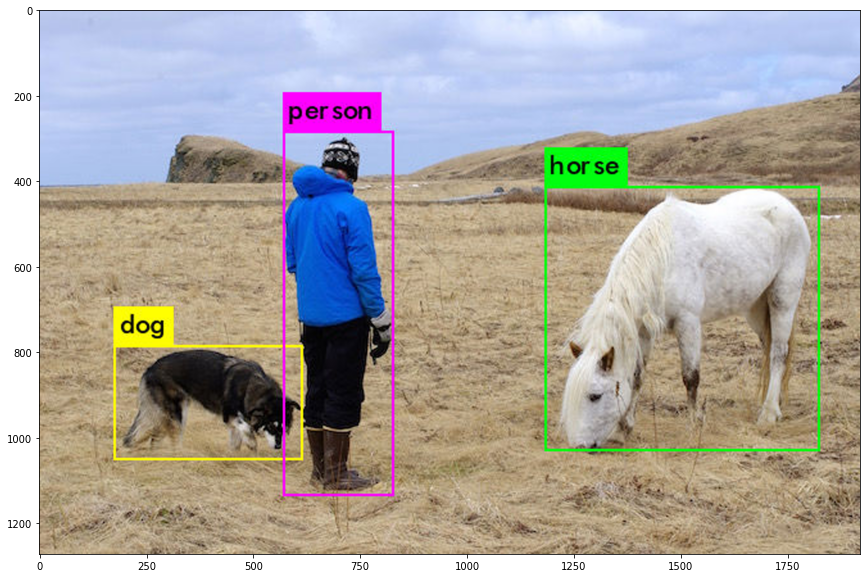

In [48]:
!./darknet detect cfg/yolov3.cfg weights/yolov3.weights data/person.jpg -dont-show
imShow('predictions.jpg')

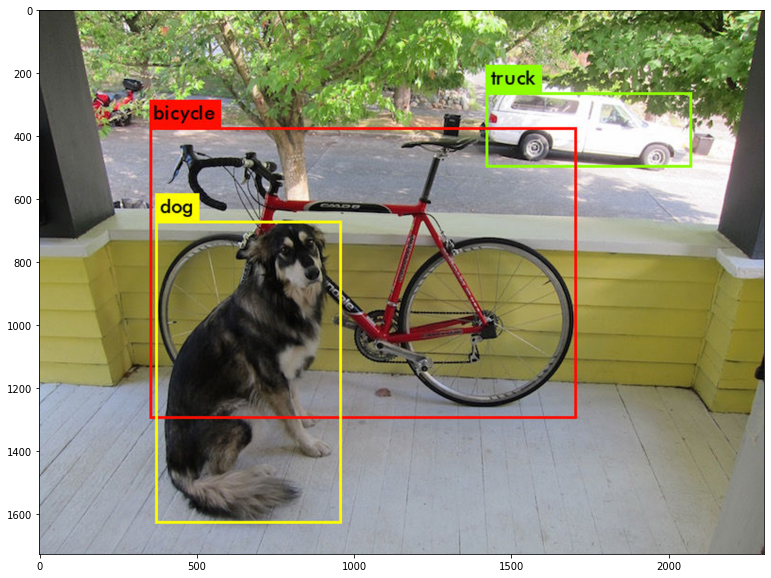